In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
df=pd.read_csv('temperature.csv')
df

,Average_Temperature,Crop_Yield
0,-5.00000,-35.618949
1,-4.97996,-39.602096
2,-4.95992,-38.276565
3,-4.93988,-37.200914
4,-4.91984,-39.269286
...,...,...
495,4.91984,7.252435
496,4.93988,8.129682
497,4.95992,5.574582
498,4.97996,3.377186


In [33]:
x=df[['Average_Temperature']]
y=df['Crop_Yield']

In [34]:
poly_feature=PolynomialFeatures(degree=2)
x_feature=poly_feature.fit_transform(x)
x_feature

array([[ 1.        , -5.        , 25.        ],
       [ 1.        , -4.97995992, 24.8000008 ],
       [ 1.        , -4.95991984, 24.60080482],
       ...,
       [ 1.        ,  4.95991984, 24.60080482],
       [ 1.        ,  4.97995992, 24.8000008 ],
       [ 1.        ,  5.        , 25.        ]], shape=(500, 3))

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_feature,y,test_size=0.2,random_state=42)

In [36]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred=model.predict(x_test)
y_pred

array([  5.15843963, -20.18312746,   5.17249645,  -8.0904511 ,
       -15.1550105 ,   5.00355498,   5.16188089, -12.20557724,
       -21.04608698,   3.30164823, -32.31928551,  -3.70161276,
         4.79131455, -18.33543448,   5.17791472,   5.07849145,
         0.62172857, -28.07637787,   4.35617418,   4.74785647,
         0.9772451 ,   0.90729675,   2.87240065,   5.1270467 ,
       -19.67228147,   2.75454492,   0.47547962,  -2.06340834,
       -15.61734844,   4.81740722,   1.95717318,   4.8571058 ,
         3.73837982,  -5.95569029, -33.79018078,   4.79669172,
         4.72526122, -20.69917074,  -2.24747612, -21.92348342,
         5.11689955, -16.87565859,   1.31832471,  -4.63646224,
       -27.49103737, -19.50315443, -34.21563386, -31.90422701,
         4.57756267, -29.66269484, -20.35456441,  -4.95847331,
       -11.22784716,   4.70208849,  -3.80317502, -23.35734652,
        -8.97116508, -30.46971277,  -2.71775141, -19.33460486,
         0.69398683,   1.84986016,   4.55777544,   1.45

In [38]:
msc=mean_squared_error(y_pred,y_test)
print(f"mean_squared_error:{msc}")
rmsc=np.sqrt(msc)
print(f"root_mean_squared_error:{rmsc}")
score=r2_score(y_pred,y_test)
print(f"score:{score}")

mean_squared_error:8.556079839469676
root_mean_squared_error:2.9250777493033713
score:0.943798675648228


In [39]:
m=model.predict(poly_feature.transform(x))

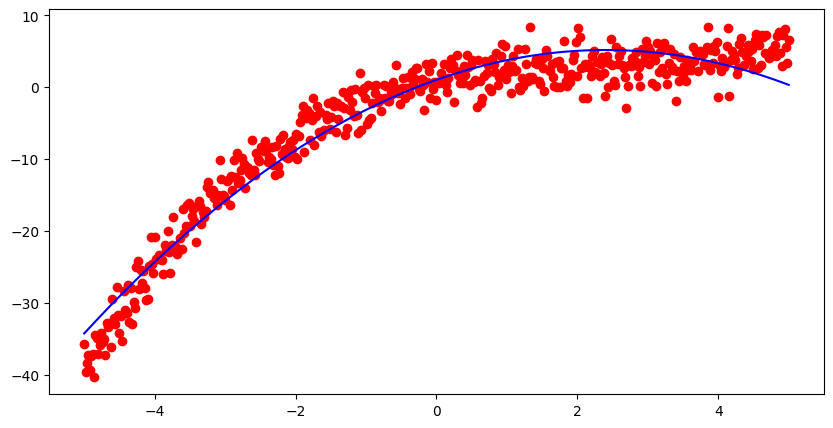

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,c="r")
plt.plot(x,m,c="b")
plt.show()

In [41]:
new_data=np.array([[4.93978]])
poly=poly_feature.transform(new_data)
predict=model.predict(poly)
predict

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([0.54925684])

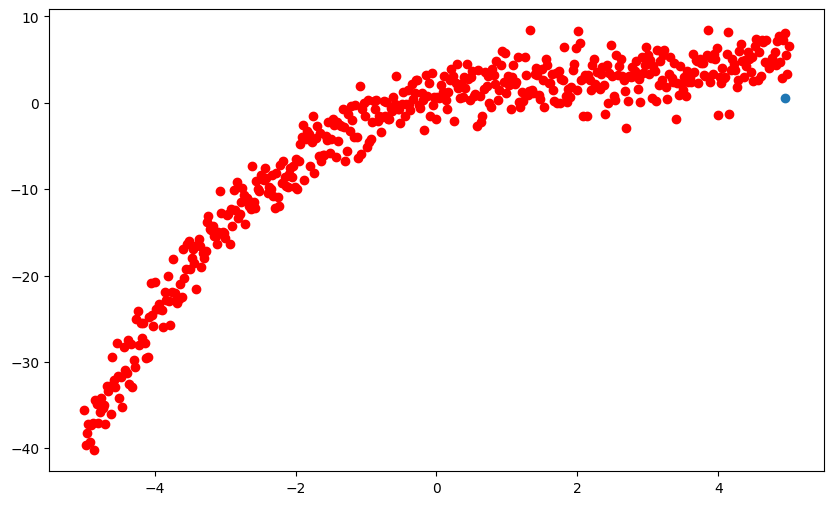

In [42]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(new_data,predict)
plt.show()